# Reading data

In [1]:
#read data on pandas
import pandas as pd

#read data
data = pd.read_csv('Brain_MRI_conditions.csv')

#display data
data.head()

,Type,Description,Body Part,"544,637"
0,MRI,Magnetic resonance imaging of the brain,Head,"283,631"
1,MRI,MRI of the brain,Head,"29,714"
2,MRI,Magnetic resonance imaging of the brain with c...,Head,"17,629"
3,MRI,Magnetic resonance imaging of the pituitary gland,Head,"10,727"
4,MRI,MRI of the brain (Turkish saddle),Head,"9,757"


dcm files contain information about the patient

In [2]:
#read random dcm data
import pydicom
import os

#read dcm file
dcm = pydicom.dcmread('//home/pvesteban/kaggle/mri/archive/ST000001/SE000001/IM000001.dcm')

#display dcm file
dcm



Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706769488.2471
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008,0012) Instance Creation Date              DA: '20230206'
(0008,0013) Instance Creation Time              TM: '090523'
(0008,0014) Instance Creator UID                UI: 1.3.46.670589.11.30059.5
(0008,0016)

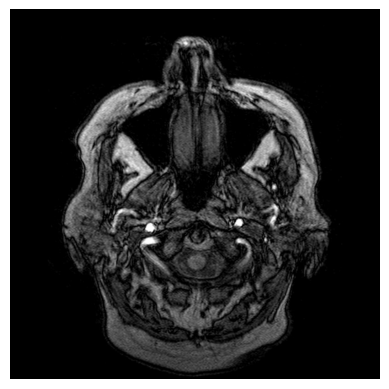

In [3]:
#display a sample mri picture
import matplotlib.pyplot as plt
 
#picture path
sample_pic = '/home/pvesteban/kaggle/mri/archive/ST000001/SE000001/IM000001.jpg'

#display picture
img = plt.imread(sample_pic)
plt.imshow(img)
plt.axis('off')
plt.show()


Now lets open the main directory of DICOM files using the pydicom library

In [1]:
import os
import pydicom

# Path to the DICOMDIR file
dicomdir_path = 'DICOMDIR'

# Load the DICOM file (which may or may not be a DICOMDIR)
try:
    dicomdir = pydicom.dcmread(dicomdir_path)
except Exception as e:
    print(f"Failed to read DICOM file: {e}")
    exit()

# Check the file meta information
print("File Meta Information:")
print(dicomdir.file_meta)

# Proceed even if it's not a standard DICOMDIR
try:
    # Attempt to access the DirectoryRecordSequence
    if hasattr(dicomdir, 'DirectoryRecordSequence'):
        print("\nDirectoryRecordSequence found. Displaying contents:\n")

        for record in dicomdir.DirectoryRecordSequence:
            print(f"Record Type: {record.DirectoryRecordType}")
            print(f"Referenced File ID: {getattr(record, 'ReferencedFileID', 'Unknown')}")
            print(f"Patient ID: {getattr(record, 'PatientID', 'Anonymized')}")
            print(f"Study Description: {getattr(record, 'StudyDescription', 'No description')}")
            print(f"Series Description: {getattr(record, 'SeriesDescription', 'No description')}")

            # Try to load the referenced file (if available)
            referenced_file_id = getattr(record, 'ReferencedFileID', None)
            if referenced_file_id:
                image_path = os.path.join(os.path.dirname(dicomdir_path), referenced_file_id)
                print(f"Attempting to load image: {image_path}")

                try:
                    image_dcm = pydicom.dcmread(image_path)
                    if hasattr(image_dcm, 'pixel_array'):
                        print(f"Image size: {image_dcm.pixel_array.shape}")
                    else:
                        print("No pixel data found.")
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

            print("\n--- End of Record ---\n")
    else:
        print("No DirectoryRecordSequence found in this file.")
except Exception as e:
    print(f"Error processing DirectoryRecordSequence: {e}")


File Meta Information:
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: 1.2.276.0.7230010.3.1.0.1
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706769493.2830
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'

DirectoryRecordSequence found. Displaying contents:

Record Type: PATIENT
Referenced File ID: Unknown
Patient ID: 3a15c3304b773918cac3f6add10130da2aafe0a71ba280b38ebe6ae7
Study Description: No description
Series Description: No description

--- End of Record ---

Record Type: STUDY
Referenced File ID: Unknown
Patient ID: Anonymized
Study Description: Head+C
Series Description: No description

--- End of Record ---

Record Type: SERIES
Re

In [2]:
import os
import pydicom

# Path to the DICOMDIR file
dicomdir_path = 'DICOMDIR'

# Load the DICOM file (which may or may not be a DICOMDIR)
try:
    dicomdir = pydicom.dcmread(dicomdir_path)
except Exception as e:
    print(f"Failed to read DICOM file: {e}")
    exit()

# Check the file meta information
print("File Meta Information:")
print(dicomdir.file_meta)

# Proceed even if it's not a standard DICOMDIR
try:
    # Attempt to access the DirectoryRecordSequence
    if hasattr(dicomdir, 'DirectoryRecordSequence'):
        print("\nDirectoryRecordSequence found. Displaying contents:\n")

        for record in dicomdir.DirectoryRecordSequence:
            print(f"Record Type: {record.DirectoryRecordType}")
            print(f"Patient ID: {getattr(record, 'PatientID', 'Anonymized')}")
            print(f"Study Description: {getattr(record, 'StudyDescription', 'No description')}")
            print(f"Series Description: {getattr(record, 'SeriesDescription', 'No description')}")

            # Handle ReferencedFileID if it's a MultiValue (list of strings)
            referenced_file_id = getattr(record, 'ReferencedFileID', None)
            if referenced_file_id:
                if isinstance(referenced_file_id, pydicom.multival.MultiValue):
                    # Join the MultiValue components into a full path
                    image_path = os.path.join(os.path.dirname(dicomdir_path), *referenced_file_id)
                else:
                    # If it's not a MultiValue, just use it as-is
                    image_path = os.path.join(os.path.dirname(dicomdir_path), referenced_file_id)
                
                print(f"Attempting to load image: {image_path}")

                # Try to load the image if it's a valid DICOM file
                try:
                    image_dcm = pydicom.dcmread(image_path)
                    if hasattr(image_dcm, 'pixel_array'):
                        print(f"Image size: {image_dcm.pixel_array.shape}")
                    else:
                        print("No pixel data found.")
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

            print("\n--- End of Record ---\n")
    else:
        print("No DirectoryRecordSequence found in this file.")
except Exception as e:
    print(f"Error processing DirectoryRecordSequence: {e}")


File Meta Information:
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: 1.2.276.0.7230010.3.1.0.1
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706769493.2830
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'

DirectoryRecordSequence found. Displaying contents:

Record Type: PATIENT
Patient ID: 3a15c3304b773918cac3f6add10130da2aafe0a71ba280b38ebe6ae7
Study Description: No description
Series Description: No description

--- End of Record ---

Record Type: STUDY
Patient ID: Anonymized
Study Description: Head+C
Series Description: No description

--- End of Record ---

Record Type: SERIES
Patient ID: Anonymized
Study Description: No description
S